In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/superstore-data/superstore_dataset2011-2015.csv


In [2]:
import unicodedata
data=pd.read_csv('../input/superstore-data/superstore_dataset2011-2015.csv',encoding = "ISO-8859-1")

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null object
Ship Date         51290 non-null object
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Postal Code       9994 non-null float64
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping C

In [5]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [6]:
data.shape

(51290, 24)

In [7]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

Text(0.5, 0, 'region distribution')

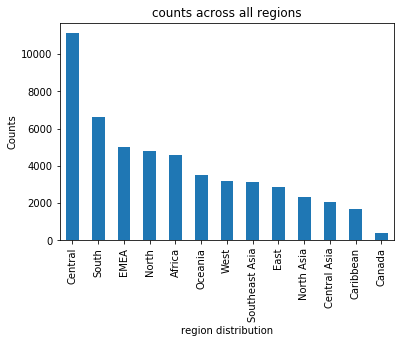

In [8]:
import seaborn as sns
from matplotlib import pyplot  as plt
data.Region.value_counts().plot(kind='bar')
plt.title('counts across all regions')
plt.ylabel('Counts')
plt.xlabel('region distribution')

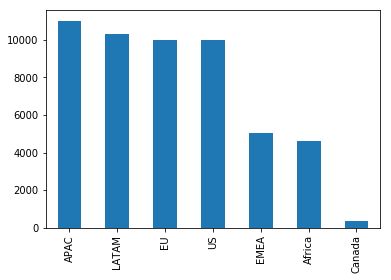

In [9]:
data.Market.value_counts().plot(kind='bar')

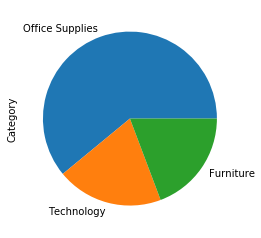

In [10]:
data.Category.value_counts().plot(kind='pie')

Text(0.5, 1.0, 'category vs quantity')

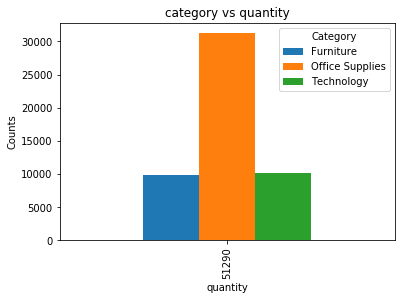

In [11]:
pd.crosstab(data['Quantity'].count(),data.Category).plot(kind='bar')
plt.ylabel('Counts')
plt.xlabel('quantity')
plt.title('category vs quantity')


In [12]:
cont = pd.get_dummies(data['Product Name'],prefix='Product Name',drop_first=True)
#Adding the results to the master dataframe
data2 = pd.concat([data,cont],axis=1)

In [13]:
col = list(data.columns)
del col[1]

In [14]:
for c in col:
    del data2[c]

In [15]:
c1 = list(data2.columns)
del c1[0]

In [16]:
d = data2.groupby(data2['Order ID']).sum()  

In [17]:
orders = pd.Series(data2['Order ID'].unique())
orders

0           AG-2011-2040
1          IN-2011-47883
2           HU-2011-1220
3        IT-2011-3647632
4          IN-2011-30733
              ...       
25030     CA-2014-115427
25031       UP-2014-4410
25032     MX-2014-108574
25033       MO-2014-2560
25034     CA-2014-156720
Length: 25035, dtype: object

In [18]:
#Here we will consider only those orders where the basket size is greater than 2. 
#This is done to reduce computational load.
d_t = d.T

In [19]:
f=[]
for col in orders:
    if d_t[col].sum()>2:
        f.append(col)

In [20]:
t=pd.DataFrame()

In [21]:
t['Order ID']=f

In [22]:
datafinal = d.merge(t,on='Order ID',how='inner')

In [23]:
#Here we will only consider those items where the count of its sale is greater than 20
product_support_dict = []
for column in c1:
    if sum(datafinal[column])<=20:
        product_support_dict.append(column)

In [24]:
for col in product_support_dict:
    del datafinal[col]

In [25]:
orders = datafinal.index.values
products = datafinal.columns.values

In [26]:
orders = list(orders)
products = list(products)
datafinal.set_index('Order ID',inplace=True)
datafinal

,"Product Name_Acco 3-Hole Punch, Economy","Product Name_Acco Binder Covers, Clear","Product Name_Acco Binder Covers, Economy","Product Name_Acco Binder Covers, Recycled","Product Name_Acco Binder, Clear","Product Name_Acco Binder, Durable","Product Name_Acco Binder, Economy","Product Name_Acco Binding Machine, Clear","Product Name_Acco Binding Machine, Durable","Product Name_Acco Binding Machine, Recycled",...,"Product Name_Wilson Jones Binder, Durable","Product Name_Wilson Jones Binding Machine, Durable","Product Name_Wilson Jones Binding Machine, Economy","Product Name_Wilson Jones Binding Machine, Recycled","Product Name_Wilson Jones Hole Reinforcements, Clear","Product Name_Wilson Jones Hole Reinforcements, Durable","Product Name_Wilson Jones Hole Reinforcements, Economy","Product Name_Wilson Jones Hole Reinforcements, Recycled","Product Name_Wilson Jones Index Tab, Clear","Product Name_Wilson Jones Index Tab, Economy"
Order ID,,,,,,,,,,,,,,,,,,,,,
AE-2014-3830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AG-2011-4560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AG-2011-8180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AG-2011-9890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AG-2012-2220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZI-2012-5310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZI-2014-3570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
ZI-2014-5970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
transaction_matrix = datafinal.as_matrix()
# get number of rows and columns
rows, columns = transaction_matrix.shape
# init new matrix
frequent_items_matrix = np.zeros((datafinal.shape[1],datafinal.shape[1]))
# compare every product with every other
for this_column in range(0, columns):
    for next_column in range(this_column + 1, columns):
        # multiply product pair vectors
        product_vector = transaction_matrix[:,this_column] * transaction_matrix[:,next_column]
        # check the number of pair occurrences in baskets
        count_matches = sum((product_vector)>0)
        # save values to new matrix
        frequent_items_matrix[this_column,next_column] = count_matches

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


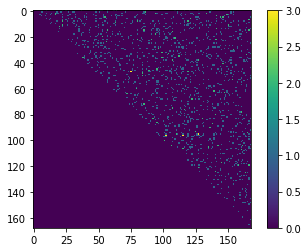

In [28]:
plt.imshow(frequent_items_matrix)
plt.colorbar()
plt.show()

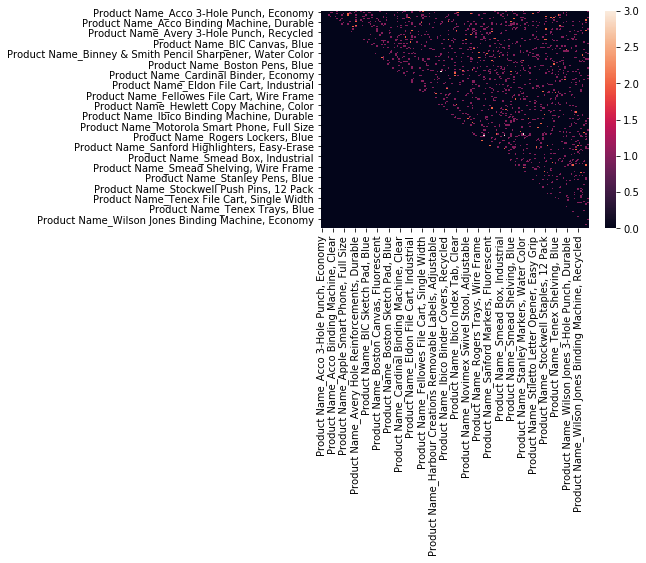

In [29]:
# and finally combine product names with data
frequent_items_df = pd.DataFrame(frequent_items_matrix, columns = datafinal.columns.values, index = datafinal.columns.values)
 
import seaborn as sns
# and plot
sns.heatmap(frequent_items_df)

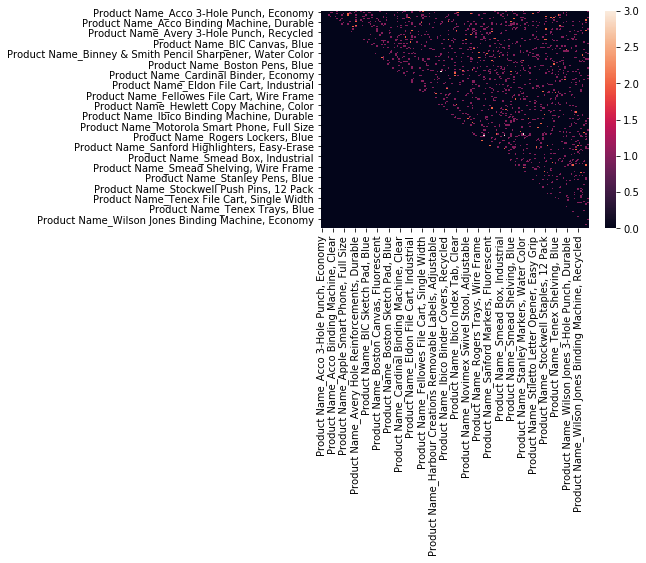

In [30]:
%matplotlib inline
sns.heatmap(frequent_items_df)

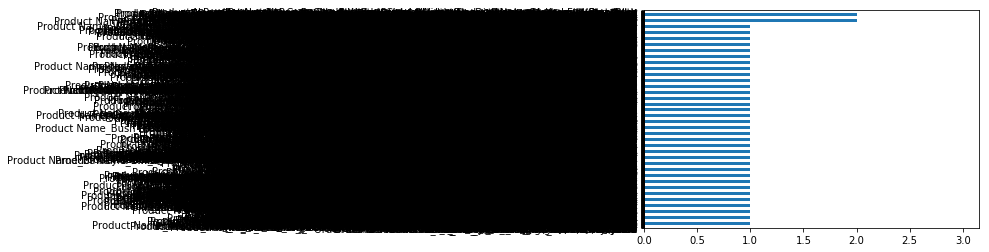

In [31]:
# extract product pairs with minimum frequency(treshold) basket occurrences
from collections import OrderedDict 
def extract_pairs(treshold,frequent_items_matrix,product_names):
    output = {}
    # select indexes with larger or equal n
    matrix_coord_list = np.where(frequent_items_matrix >= treshold)
    # take values
    row_coords = matrix_coord_list[0]
    column_coords = matrix_coord_list[1]
    # generate pairs
    for index, value in enumerate(row_coords):
        #print index
        row = row_coords[index]
        column = column_coords[index]
        # get product names
        first_product = product_names[row]
        second_product = product_names[column]
        # number of basket matches
        matches = frequent_items_matrix[row,column]
        # put key values into dict
        output[first_product+"-"+second_product] = matches
 
    # return sorted dict
    sorted_output = OrderedDict(sorted(output.items(), key=lambda x: x[1]))
    return sorted_output
 
# plot pairs with minimum frequency of 1 basket matches
pd.Series(extract_pairs(1,frequent_items_matrix,products)).plot(kind="barh")
finallist = pd.Series(extract_pairs(1,frequent_items_matrix,products))

In [32]:
finallist = pd.Series(extract_pairs(1,frequent_items_matrix,products))
finallist 

Order ID-Product Name_Acco Binding Machine, Recycled                                                  1.0
Order ID-Product Name_Avery Hole Reinforcements, Durable                                              1.0
Order ID-Product Name_BIC Canvas, Blue                                                                1.0
Order ID-Product Name_Boston Highlighters, Easy-Erase                                                 1.0
Order ID-Product Name_Cardinal Hole Reinforcements, Clear                                             1.0
                                                                                                     ... 
Product Name_Stanley Highlighters, Easy-Erase-Product Name_Wilson Jones Hole Reinforcements, Clear    2.0
Product Name_Cardinal Binder Covers, Economy-Product Name_Hon Swivel Stool, Black                     3.0
Product Name_Rogers File Cart, Industrial-Product Name_Stanley Markers, Water Color                   3.0
Product Name_Rogers File Cart, Single Width-Pr

In [33]:
finallistD = pd.DataFrame()
finallistD['Count']=finallist

In [34]:
finallistD

,Count
"Order ID-Product Name_Acco Binding Machine, Recycled",1.0
"Order ID-Product Name_Avery Hole Reinforcements, Durable",1.0
"Order ID-Product Name_BIC Canvas, Blue",1.0
"Order ID-Product Name_Boston Highlighters, Easy-Erase",1.0
"Order ID-Product Name_Cardinal Hole Reinforcements, Clear",1.0
...,...
"Product Name_Stanley Highlighters, Easy-Erase-Product Name_Wilson Jones Hole Reinforcements, Clear",2.0
"Product Name_Cardinal Binder Covers, Economy-Product Name_Hon Swivel Stool, Black",3.0
"Product Name_Rogers File Cart, Industrial-Product Name_Stanley Markers, Water Color",3.0
"Product Name_Rogers File Cart, Single Width-Product Name_SanDisk Numeric Keypad, Bluetooth",3.0
